In [177]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans


In [178]:
def BuildGraph (n, adj) :
    g = nx.Graph()
    for i in range(n):
        for j in range(n): 
            if (adj[i][j] != 0) :
                g.add_edge(i, j)
    return g

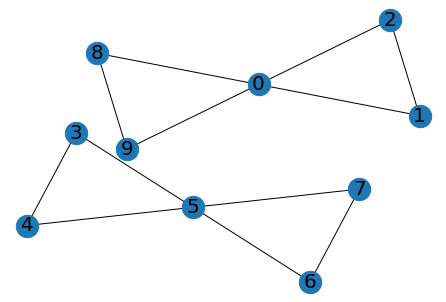

In [179]:
adj = np.array([
		[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
		[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
		[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
		[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
		[0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
		[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
		[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
	])

n = len(adj[0])
graph = BuildGraph(n, adj)
nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100)
plt.show()

Laplacian: 
[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [-1  0  0  0  0  0  0  0  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


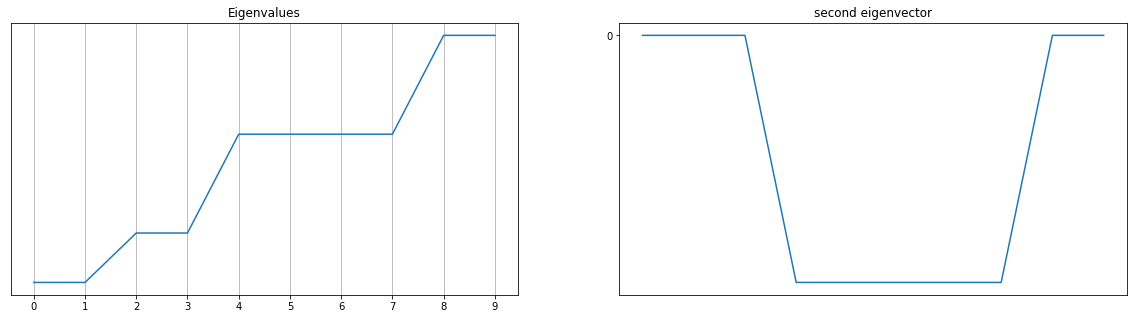

Fiedler value(second eigenvelue):  3.3134615995519985e-16
Fiedler vector(second eigenvector):  [ 0.     0.    -0.    -0.447 -0.447 -0.447 -0.447 -0.447  0.    -0.   ]
Cluster centers: 
 [[-0.4472136]
 [ 0.       ]]
Cluster labels:  [1 1 1 0 0 0 0 0 1 1]


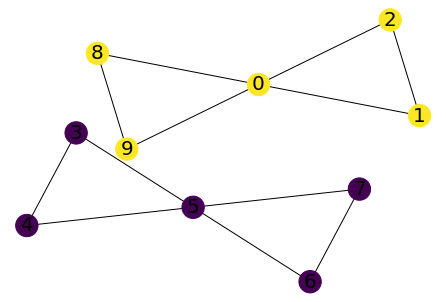

In [180]:
deg = np.diag(adj.sum(axis=1))
laplacian = deg - adj

eigenvalues, eigenvectors = np.linalg.eig(laplacian)

print("Laplacian: ")
print (laplacian)

fig, axs = plt.subplots(1, 2, figsize=(20, 5), subplot_kw=dict(xticks=[], yticks=[]))
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
axs[0].plot(eigenvalues)
axs[0].set_xticks(range(len(eigenvalues)))
axs[0].grid()
axs[0].set_title("Eigenvalues")

axs[1].plot(eigenvectors[:,1])
axs[1].set_yticks([0])
axs[1].set_title("second eigenvector")
plt.show()

print ("Fiedler value(second eigenvelue): ", eigenvalues[1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvectors[:,1:2])
colors = kmeans.labels_

print ("Fiedler vector(second eigenvector): ", np.round(eigenvectors[:,1], 3))
print ("Cluster centers: \n", kmeans.cluster_centers_)
print ("Cluster labels: ", colors)

nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100, node_color=colors, nodelist=range(0, n))
plt.show()

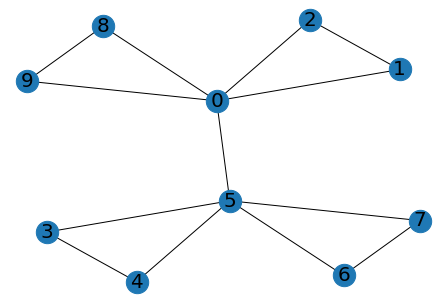

In [181]:
adj = np.array([
		[0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
		[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
		[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
		[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
		[0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
		[1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
		[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
		[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
	])
n = len(adj[0])
graph = BuildGraph(n, adj)
nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100)
plt.show()

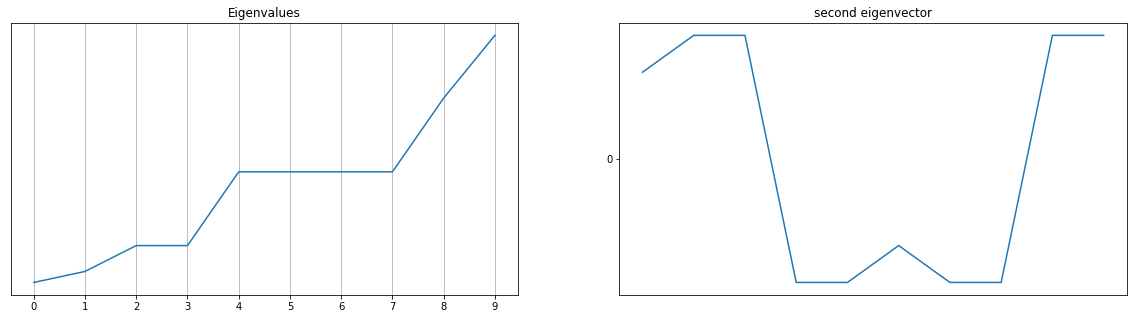

Fiedler value(second eigenvelue):  0.29843788128357546
Fiedler vector(second eigenvector):  [ 0.234  0.334  0.334 -0.334 -0.334 -0.234 -0.334 -0.334  0.334  0.334]
2-Cluster centers: 
 [[-0.31370984]
 [ 0.31370984]]
2-Cluster labels:  [1 1 1 0 0 0 0 0 1 1]


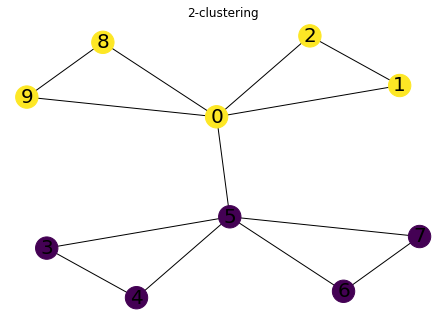

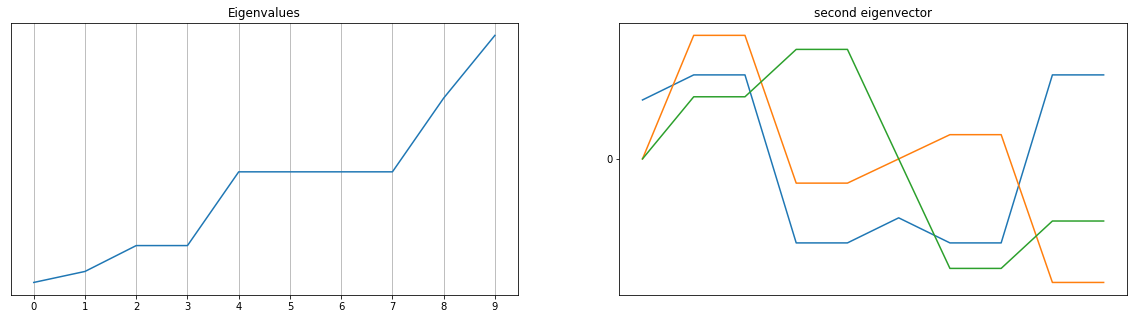

First* 3 eigenvectors:
[ 0.234  0.334  0.334 -0.334 -0.334 -0.234 -0.334 -0.334  0.334  0.334]
[-0.     0.491  0.491 -0.096 -0.096  0.     0.096  0.096 -0.491 -0.491]
[-0.     0.247  0.247  0.435  0.435 -0.    -0.435 -0.435 -0.247 -0.247]
Cluster centers: 
 [[-0.33362299 -0.09621369  0.43490268]
 [ 0.30043441 -0.32710374 -0.16446501]
 [ 0.33362299  0.49065561  0.24669751]
 [-0.30043441  0.06414246 -0.28993512]]
Cluster labels:  [1 2 2 0 0 3 3 3 1 1]


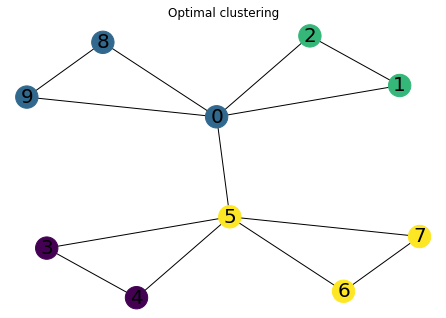

In [182]:
deg = np.diag(adj.sum(axis=1))
laplacian = deg - adj

eigenvalues, eigenvectors = np.linalg.eig(laplacian)

fig, axs = plt.subplots(1, 2, figsize=(20, 5), subplot_kw=dict(xticks=[], yticks=[]))
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
axs[0].plot(eigenvalues)
axs[0].set_xticks(range(len(eigenvalues)))
axs[0].grid()
axs[0].set_title("Eigenvalues")

axs[1].plot(eigenvectors[:,1])
axs[1].set_yticks([0])
axs[1].set_title("second eigenvector")
plt.show()

print ("Fiedler value(second eigenvelue): ", eigenvalues[1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvectors[:,1:2])
colors = kmeans.labels_

print ("Fiedler vector(second eigenvector): ", np.round(eigenvectors[:,1], 3))
print ("2-Cluster centers: \n", kmeans.cluster_centers_)
print ("2-Cluster labels: ", colors)

nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100, node_color=colors, nodelist=range(0,n))
plt.title("2-clustering")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 5), subplot_kw=dict(xticks=[], yticks=[]))
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
axs[0].plot(eigenvalues)
axs[0].set_xticks(range(len(eigenvalues)))
axs[0].grid()
axs[0].set_title("Eigenvalues")

axs[1].plot(eigenvectors[:,1])
axs[1].plot(eigenvectors[:,2])
axs[1].plot(eigenvectors[:,3])

axs[1].set_title("second eigenvector")
axs[1].set_yticks([0])
plt.show()

print ("First* 3 eigenvectors:")
print (np.round(eigenvectors[:,1], 3))
print (np.round(eigenvectors[:,2], 3))
print (np.round(eigenvectors[:,3], 3))

kmeans = KMeans(n_clusters=4)
kmeans.fit(eigenvectors[:,1:4])
colors = kmeans.labels_

print ("Cluster centers: \n", kmeans.cluster_centers_)
print ("Cluster labels: ", colors)

nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100, node_color=colors, nodelist=range(0,n))
plt.title("Optimal clustering")
plt.show()

In [183]:
def spectral_cluster(n, adj, k= 2):
	graph = BuildGraph(n, adj)

	deg = np.diag(adj.sum(axis=1))
	laplacian = deg - adj

	eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

	eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
	eigenvalues = eigenvalues[np.argsort(eigenvalues)]

	fig, axs = plt.subplots(1, 2, figsize=(10, 5))

	axs[0].plot(eigenvalues)
	axs[0].set_xticks(range(len(eigenvalues)))
	axs[0].set_title("all eigenvalues")
	axs[1].plot(eigenvalues[:10])
	axs[1].set_xticks(range(10))
	axs[1].grid()
	axs[1].set_title("first 10 eigenvalues")
	fig.suptitle("Eigenvalues")
	plt.show()

	kmeans = KMeans(n_clusters=k)
	kmeans.fit(eigenvectors[:,1:k])
	colors = kmeans.labels_

	return colors

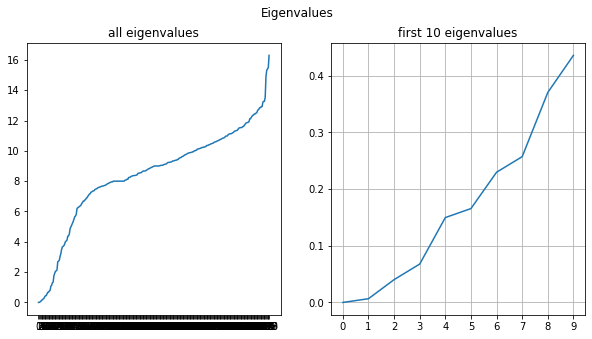

Spectral clustering accuracy:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.99      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



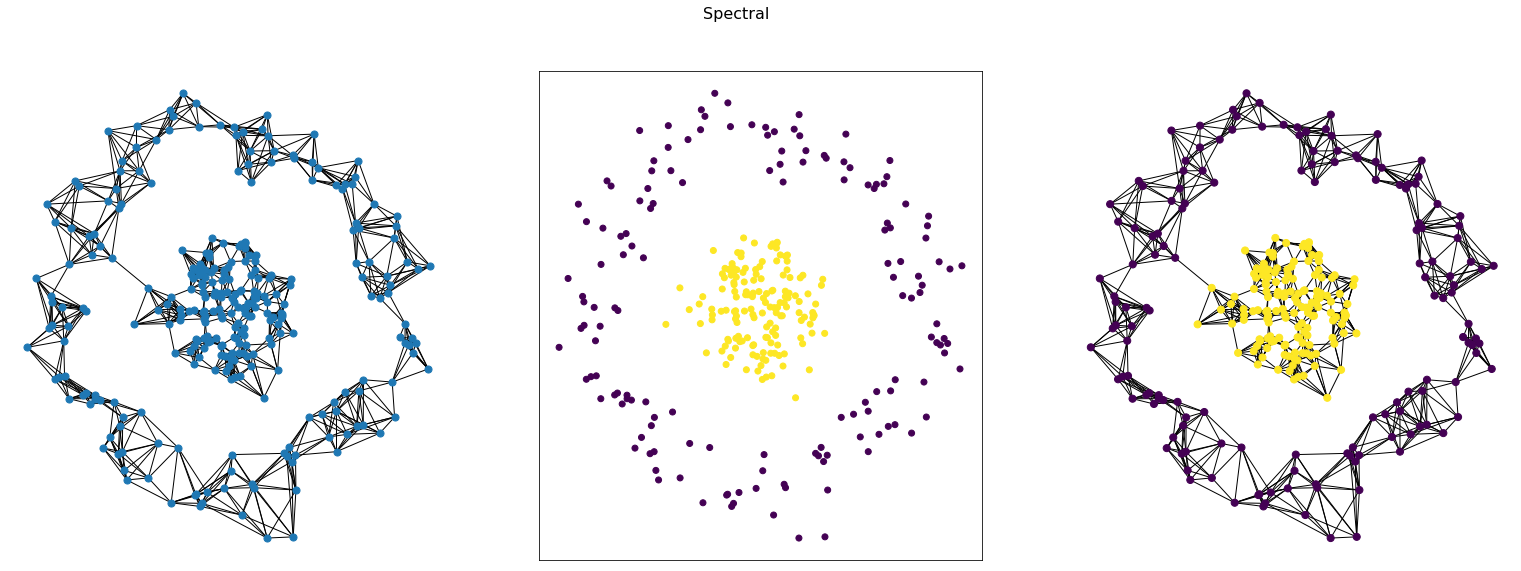

K-means clustering accuracy:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50       150
           1       0.52      0.59      0.55       150

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.53      0.53      0.52       300



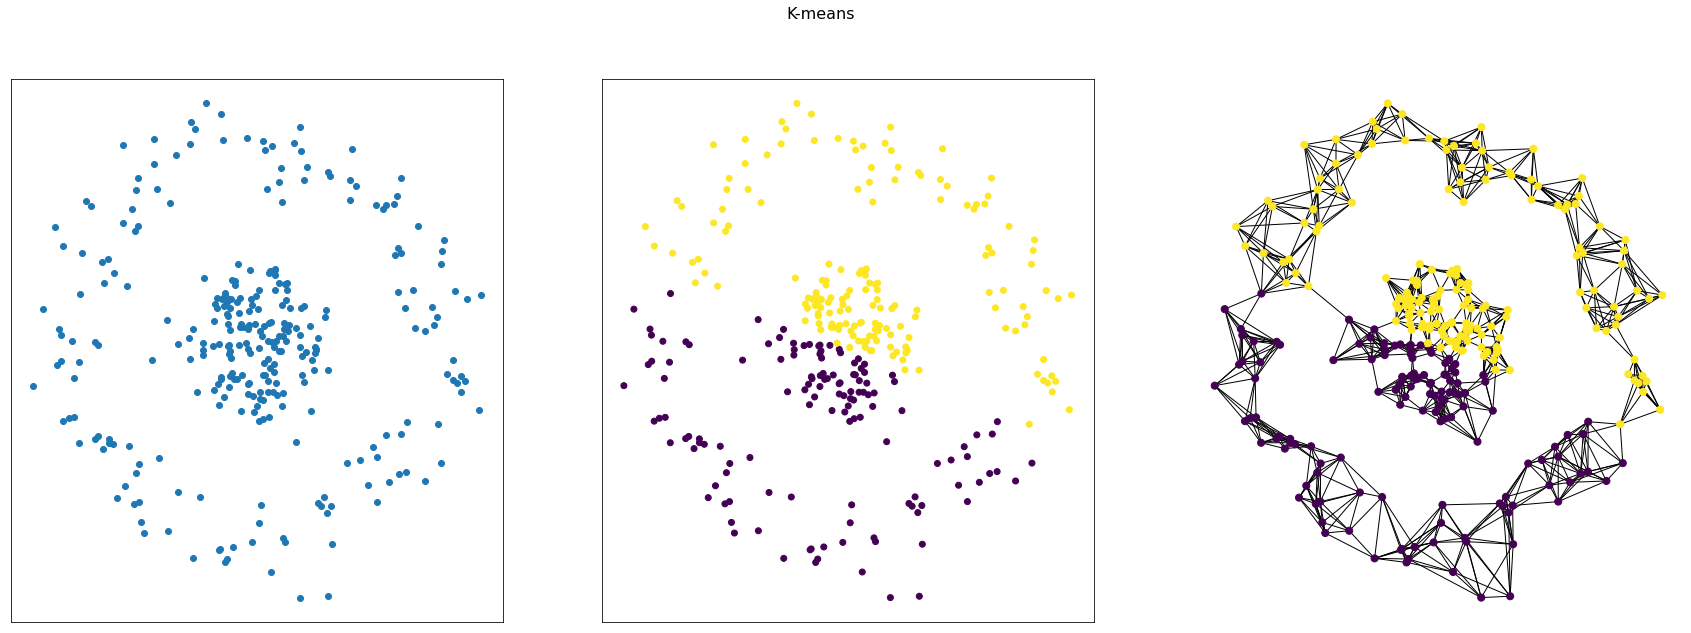

In [184]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph

X, labels = make_circles(n_samples=300, noise=0.12, factor=.2)
adj = kneighbors_graph(X, n_neighbors=7, ).toarray()
n = len(adj)
for i in range(n):
	for j in range(i, n):
		if (adj[i][j] != adj[j][i]):
			adj[i][j] = 1
			adj[j][i] = 1
graph = BuildGraph(n, adj)

colors = spectral_cluster(n, adj, k=2)

from sklearn.metrics import classification_report
print("Spectral clustering accuracy:\n", classification_report(labels, colors))

fig, axs = plt.subplots(1, 3, figsize=(27, 9), subplot_kw=dict(xticks=[], yticks=[]))
nx.draw(graph, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,n), pos= X, ax= axs[0])
axs[1].scatter(X[:,0], X[:,1], c=colors)
nx.draw(graph, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,n), pos= X, node_color=colors, ax = axs[2])
fig.suptitle("Spectral", fontsize=16)
plt.show()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
colors = kmeans.labels_

print("K-means clustering accuracy:\n", classification_report(labels, colors))

fig, axs = plt.subplots(1, 3, figsize=(30, 10), subplot_kw=dict(xticks=[], yticks=[]))
axs[0].scatter(X[:,0], X[:,1])
axs[1].scatter(X[:,0], X[:,1], c=colors)
nx.draw(graph, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,n), pos= X, node_color=colors, ax = axs[2])
fig.suptitle("K-means", fontsize=16)
plt.show()

In [185]:
import pandas as pd
df1 = pd.read_csv("./first_clustering_dataset.csv", names=['c1', 'c2'])
df2 = pd.read_csv("./second_clustering_dataset.csv", names=['c1', 'c2'])
df3 = pd.read_csv("./third_clustering_dataset.csv", names=['c1', 'c2'])

from sklearn.neighbors import kneighbors_graph

adj1 = kneighbors_graph(df1, n_neighbors=5, ).toarray()
n = len(adj1)
for i in range(n):
	for j in range(i, n):
		if (adj1[i][j] != adj1[j][i]):
			adj1[i][j] = 1
			adj1[j][i] = 1
graph1 = BuildGraph(len(adj1), adj1)

adj1_2 = kneighbors_graph(df1, n_neighbors=5, mode='distance').toarray()
n = len(adj1_2)
for i in range(n):
	for j in range(i, n):
		if (adj1_2[i][j] != adj1_2[j][i]):
			adj1_2[i][j] = max(adj1_2[i][j], adj1_2[j][i])
			adj1_2[j][i] = adj1_2[i][j]
graph1_2 = BuildGraph(len(adj1_2), adj1_2)

adj2 = kneighbors_graph(df2, n_neighbors=7, ).toarray()
n = len(adj2)
for i in range(n):
	for j in range(i, n):
		if (adj2[i][j] != adj2[j][i]):
			adj2[i][j] = 1
			adj2[j][i] = 1
graph2 = BuildGraph(len(adj2), adj2)


adj3 = kneighbors_graph(df3, n_neighbors=7, ).toarray()
n = len(adj3)
for i in range(n):
	for j in range(i, n):
		if (adj3[i][j] != adj3[j][i]):
			adj3[i][j] = 1
			adj3[j][i] = 1
graph3 = BuildGraph(len(adj3), adj3)

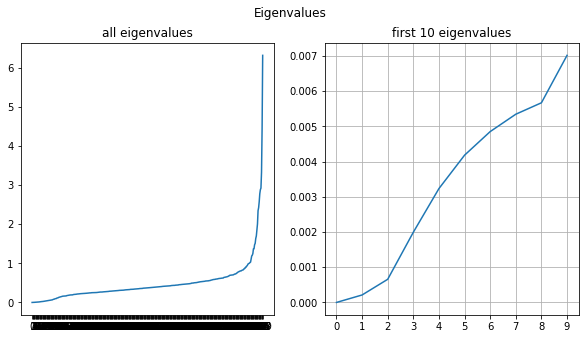

Text(0.5, 0.98, 'dataset 1, with weighted knn graph')

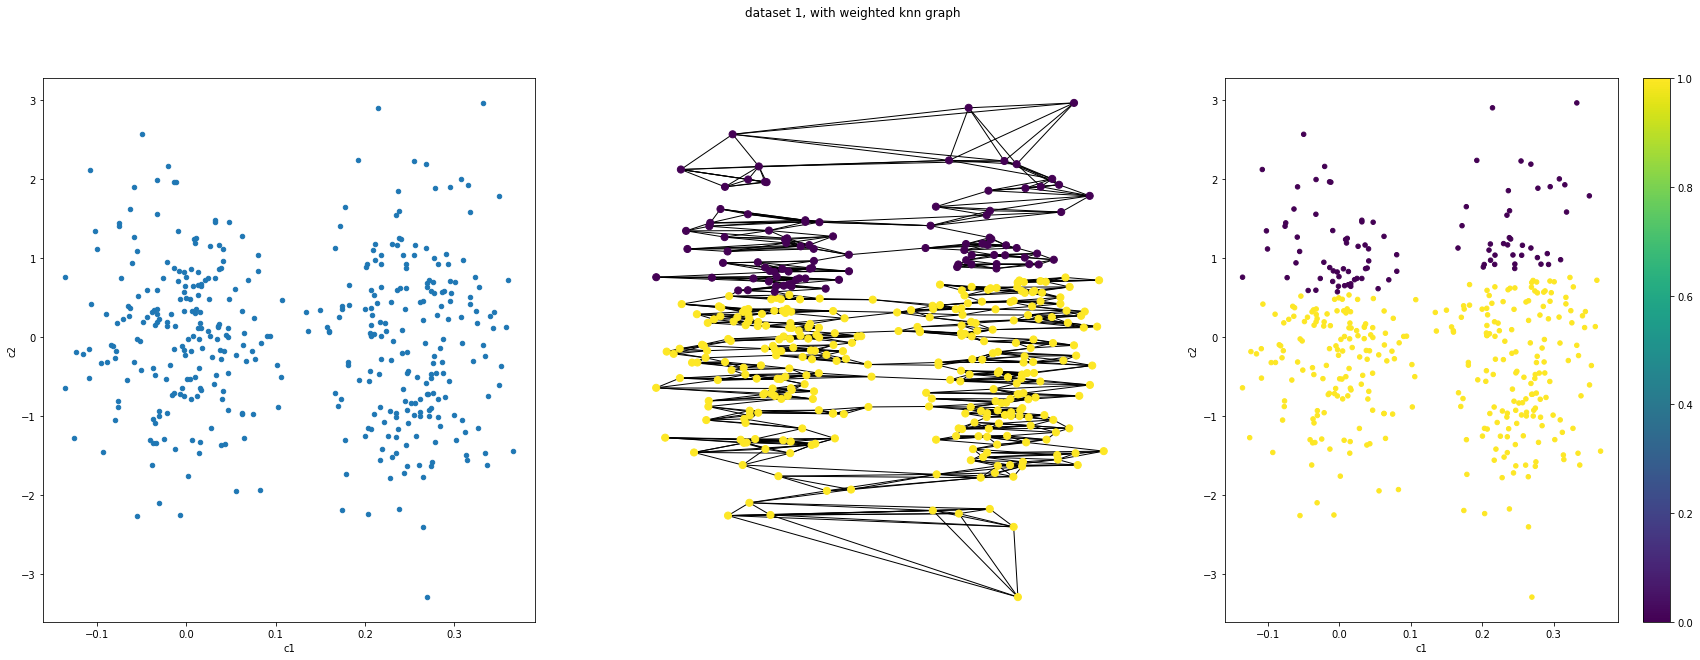

In [186]:
colors1_2 = spectral_cluster(len(adj1_2), adj1_2, 2)

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
df1.plot.scatter(ax= axs[0], x = 'c1', y = 'c2')
nx.draw(graph1_2, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,len(adj1_2)), pos= df1.to_numpy(), node_color=colors1_2, ax = axs[1])
df1.plot.scatter(ax= axs[2], x = 'c1', y = 'c2', c=colors1_2, colormap='viridis')
fig.suptitle("dataset 1, with weighted knn graph")

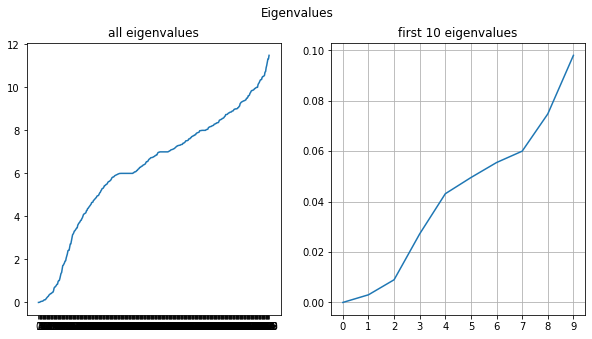

In [187]:
colors1 = spectral_cluster(len(adj1), adj1, 3)


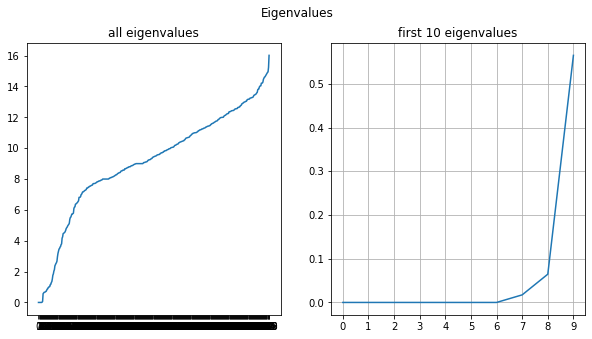

In [188]:
colors2 = spectral_cluster(len(adj2), adj2, 9)

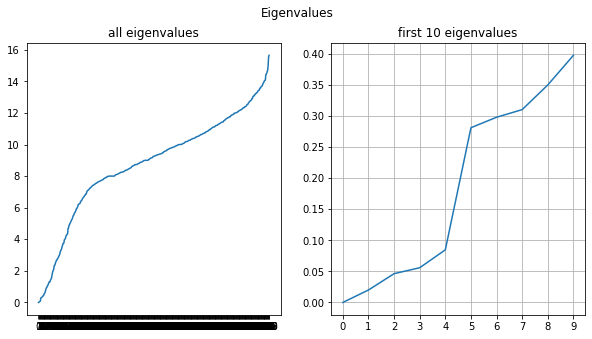

In [189]:
colors3 = spectral_cluster(len(adj3), adj3, 5)

<AxesSubplot:xlabel='c1', ylabel='c2'>

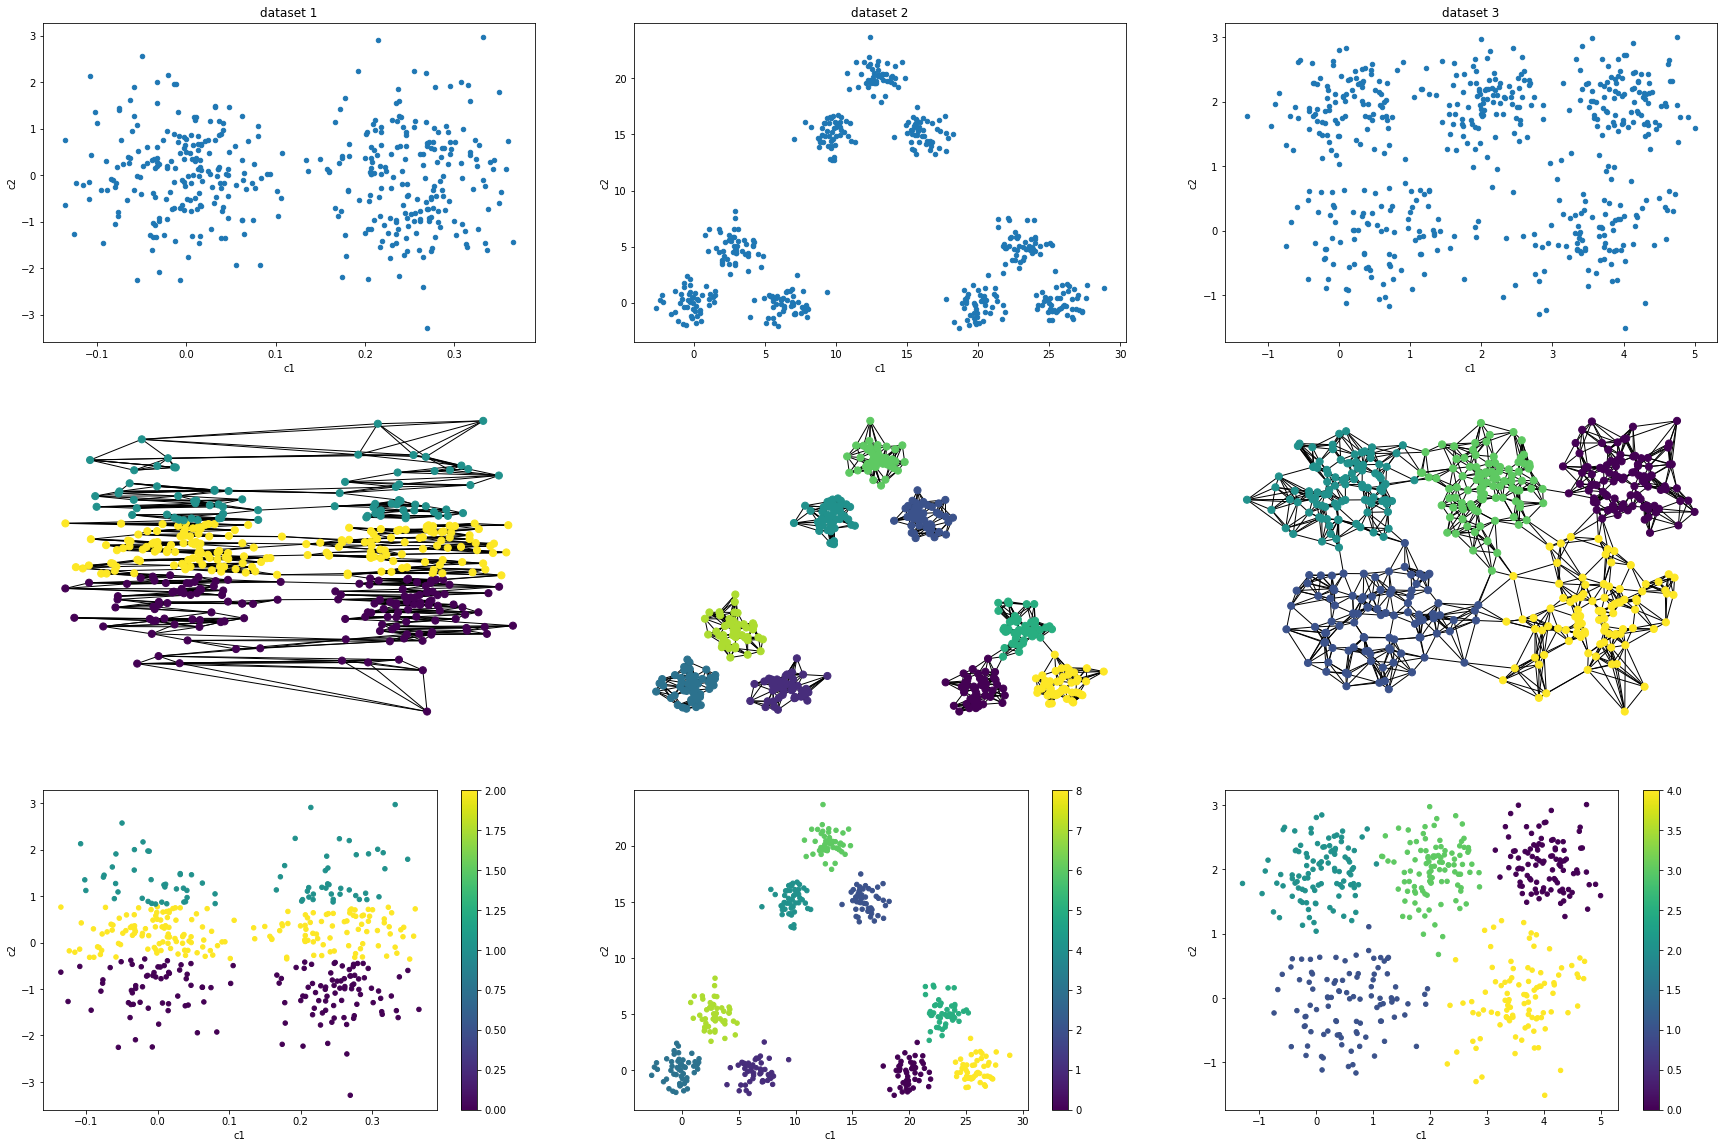

In [190]:
fig, axs = plt.subplots(3, 3, figsize=(30, 20))
df1.plot.scatter(ax= axs[0][0], x = 'c1', y = 'c2')
df2.plot.scatter(ax= axs[0][1], x = 'c1', y = 'c2')
df3.plot.scatter(ax= axs[0][2], x = 'c1', y = 'c2')
axs[0][0].set_title("dataset 1")
axs[0][1].set_title("dataset 2")
axs[0][2].set_title("dataset 3")
nx.draw(graph1, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,len(adj1)), pos= df1.to_numpy(), node_color=colors1, ax = axs[1][0])
nx.draw(graph2, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,len(adj2)), pos= df2.to_numpy(), node_color=colors2, ax = axs[1][1])
nx.draw(graph3, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,len(adj3)), pos= df3.to_numpy(), node_color=colors3, ax = axs[1][2])
df1.plot.scatter(ax= axs[2][0], x = 'c1', y = 'c2', c=colors1, colormap='viridis')
df2.plot.scatter(ax= axs[2][1], x = 'c1', y = 'c2', c=colors2, colormap='viridis')
df3.plot.scatter(ax= axs[2][2], x = 'c1', y = 'c2', c=colors3, colormap='viridis')